# Itaguai Buoy - Quality Control Analysis

## Import libs

In [4]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [5]:
# FOLDER PATH
folder_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'


# DATA RAW
raw_data_path = os.path.join(folder_path, 'pnboia_raw_data-renamed.csv')
buoys_df_raw = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# DATA SITE
raw_data_path = os.path.join(folder_path, 'pnboia_site_data-renamed.csv')
buoys_df_site = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_site['Datetime'] = pd.to_datetime(buoys_df_site['Datetime'])
buoys_df_site.set_index(['buoy','Datetime'], inplace=True)

# LIMITS
# Limits from pnboia_limits_tests.py
itaguai_lims = pnboia_limits_tests.itaguai

In [6]:
buoys_df_raw.index.levels[0].unique()

Index(['cabofrio', 'cabofrio2', 'fortaleza', 'itaguai', 'itajai_0', 'itaoca',
       'minuano', 'niteroi', 'ocas', 'porto_seguro', 'recife', 'rio_grande',
       'santos', 'vitoria'],
      dtype='object', name='buoy')

## Preliminary Filtering

- Filter bad period (> '2013-03')

In [7]:
# filter data with

itaguai = filter_data(data=buoys_df_raw,
                    buoy='itaguai',
                    limits=itaguai_lims,
                    outlier_check=False,
                    t_continuity_check=False)

itaguai = itaguai.drop(columns=itaguai.filter(regex='dir|head|spread').columns)

# Filter bad period
# itaguai = itaguai.loc[:'2017-05']

# Filter bad srad data
# itaguai = itaguai.where(itaguai['srad'] < 1500)

# # Drop all-nans columns
# itaguai.dropna(how='all',axis=1, inplace=True)

mis_value_check done.
range_check done.


## Statistical Analysis

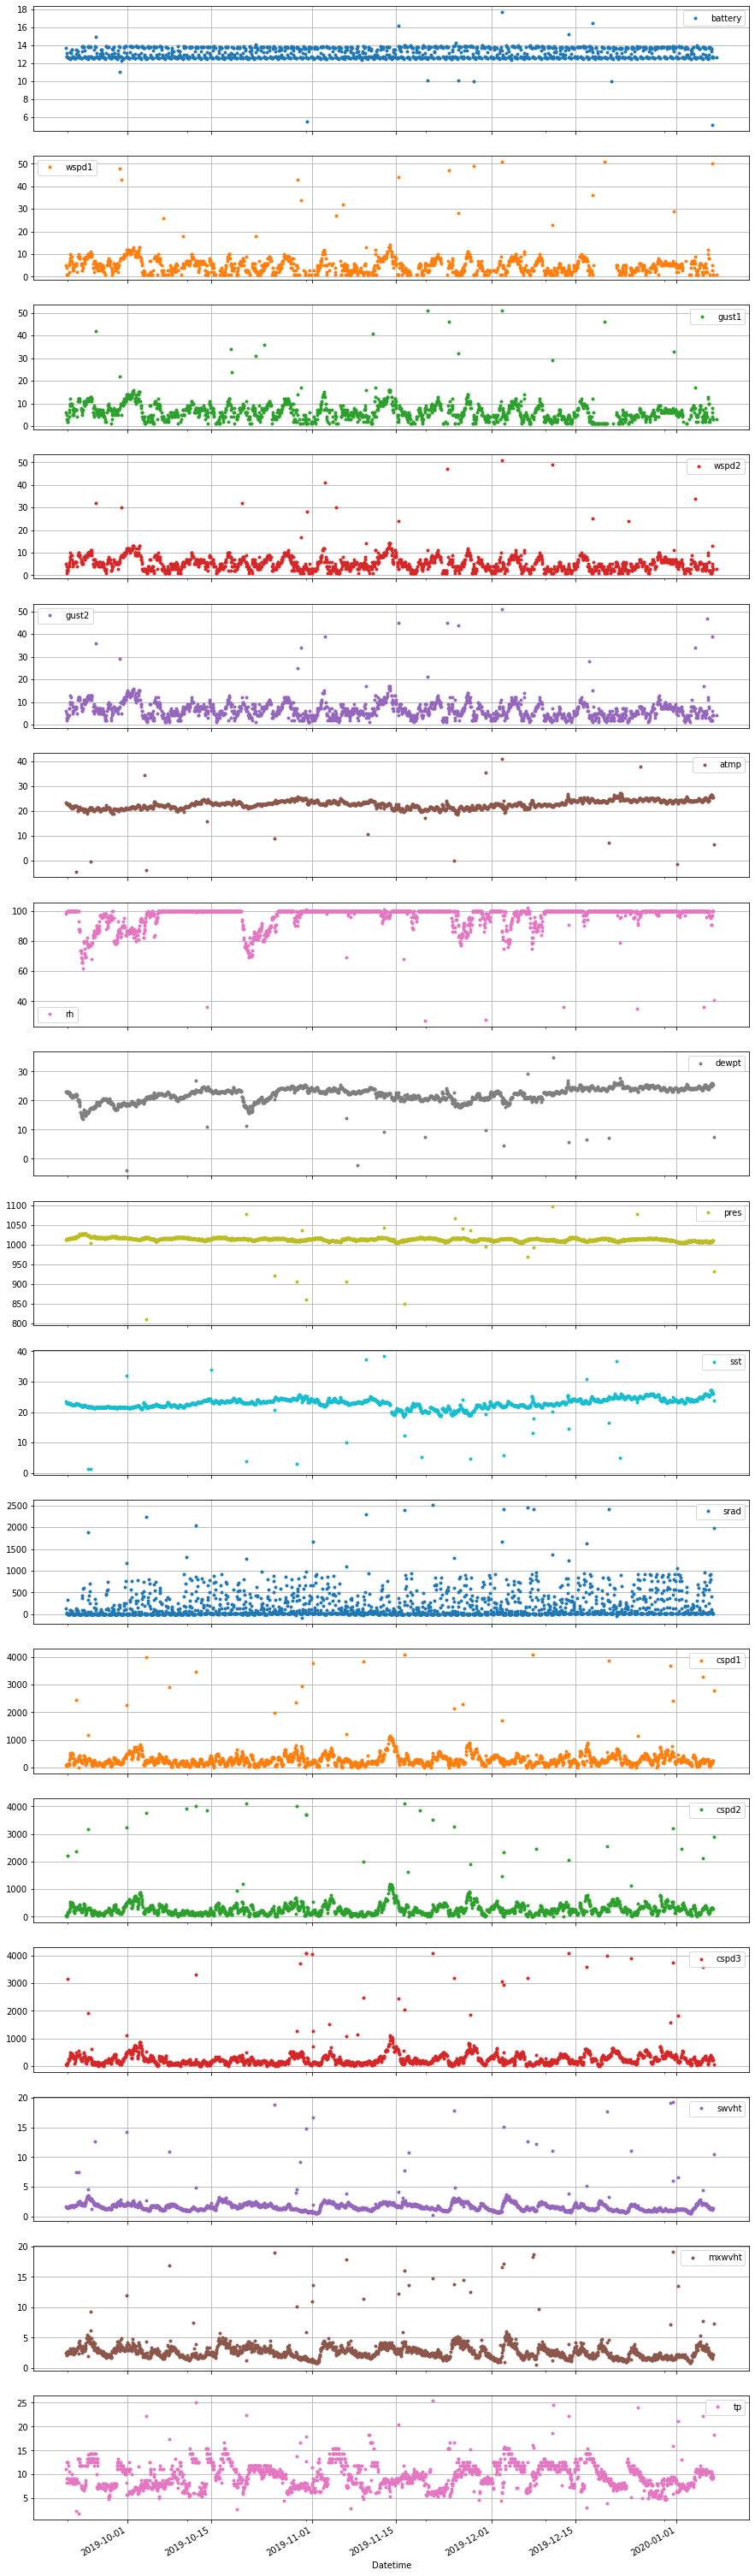

In [8]:
itaguai.plot(subplots=True, marker='.', linestyle='None', grid=True,figsize=(15,60));

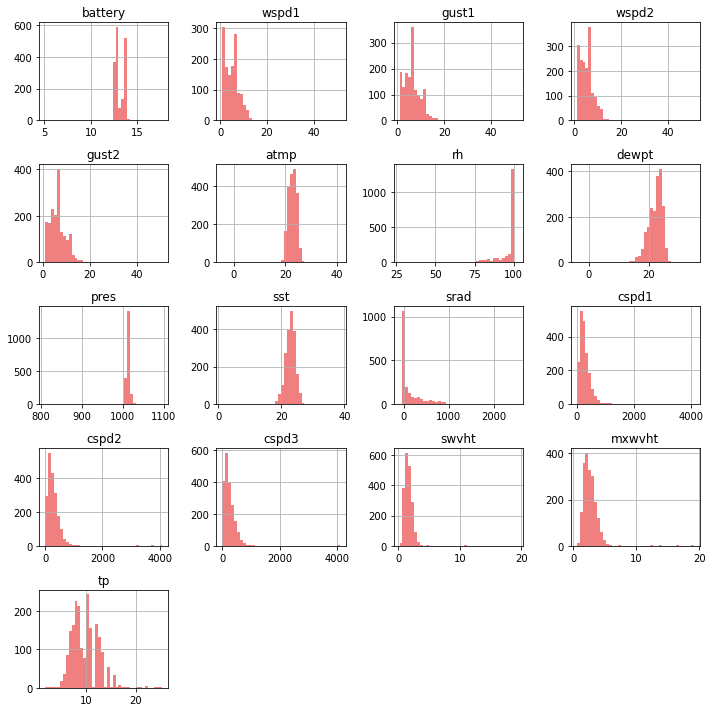

In [9]:
itaguai.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

## Limits generation and data filtering

In [10]:
# Generated lims
itaguai_out_lims_df_3 = gen_outlier_lim(itaguai, buoy_name='itaguai', std_factor=3).round(1)

# Generate lims dict
itaguai_out_lims_dict_3 = manual_outlier_lims(itaguai_out_lims_df_3, buoy_name='itaguai')

# filter data with
itaguai3 = filter_data(data=itaguai,
                    buoy='itaguai',
                    limits=itaguai_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=itaguai_out_lims_dict_3)

outlier_check done.


In [11]:
# Generated lims
itaguai_out_lims_df_5 = gen_outlier_lim(itaguai, buoy_name='itaguai', std_factor=5).round(1)

# Generate lims dict
itaguai_out_lims_dict_5 = manual_outlier_lims(itaguai_out_lims_df_5, buoy_name='itaguai')

# filter data with
itaguai2 = filter_data(data=itaguai,
                    buoy='itaguai',
                    limits=itaguai_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=itaguai_out_lims_dict_5)

outlier_check done.


In [12]:
itaguai_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,5.4,4.8,3.0,14.5,0.0,19.9
gust1,6.6,4.5,3.0,13.4,0.0,20.0
wspd2,5.3,3.8,3.0,11.4,0.0,16.7
gust2,6.6,4.2,3.0,12.7,0.0,19.3
atmp,22.7,2.2,3.0,6.5,16.2,29.1
rh,96.2,7.6,3.0,22.9,73.2,119.1
dewpt,22.0,2.6,3.0,7.7,14.3,29.7
pres,1013.6,9.6,3.0,28.7,984.9,1042.3
sst,22.8,2.1,3.0,6.2,16.6,29.1


In [13]:
itaguai_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,5.4,4.8,5.0,24.2,0.0,29.6
gust1,6.6,4.5,5.0,22.3,0.0,28.9
wspd2,5.3,3.8,5.0,19.0,0.0,24.3
gust2,6.6,4.2,5.0,21.2,0.0,27.8
atmp,22.7,2.2,5.0,10.8,11.9,33.4
rh,96.2,7.6,5.0,38.2,57.9,134.4
dewpt,22.0,2.6,5.0,12.8,9.2,34.9
pres,1013.6,9.6,5.0,47.9,965.7,1061.5
sst,22.8,2.1,5.0,10.4,12.4,33.2


# Testing generated limits

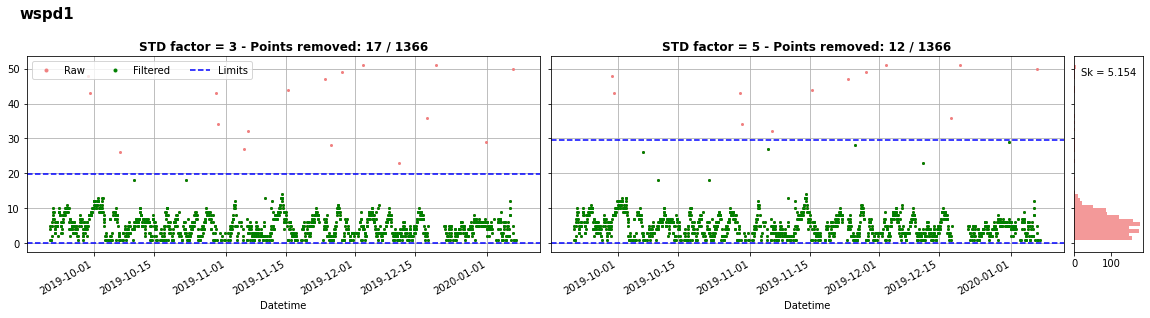

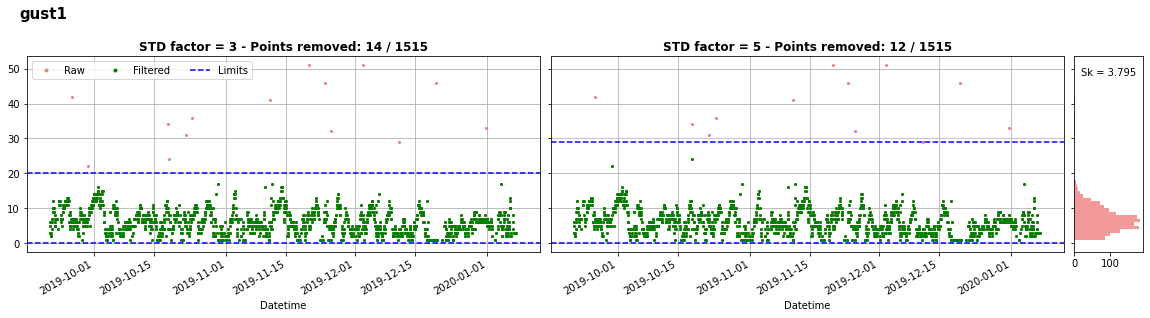

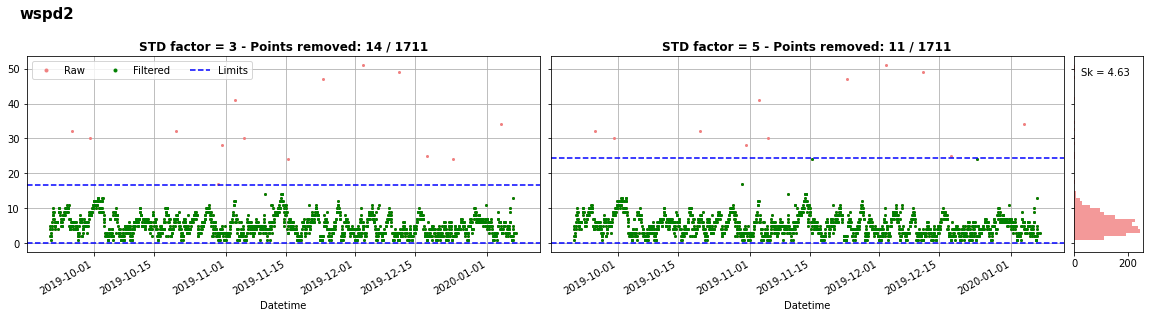

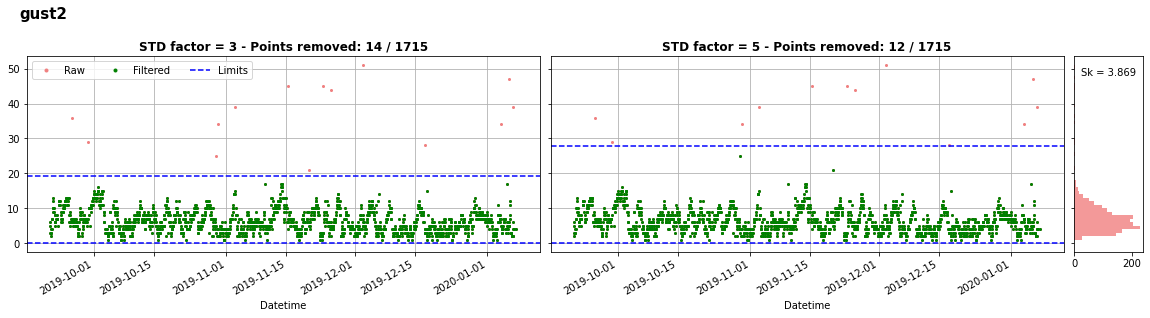

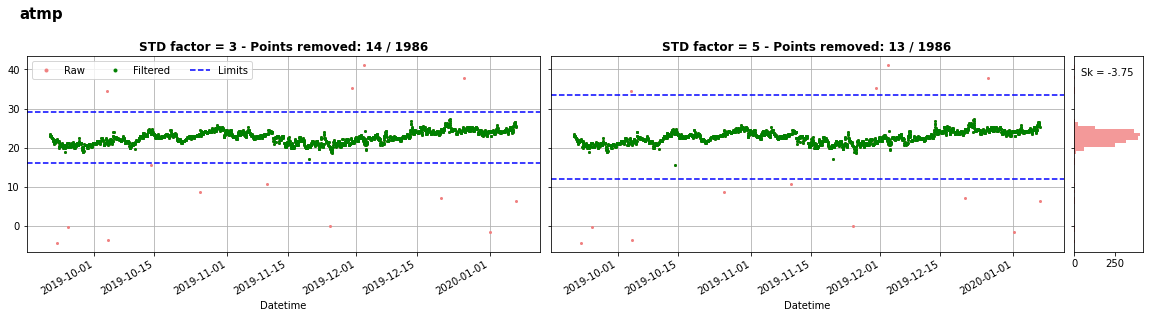

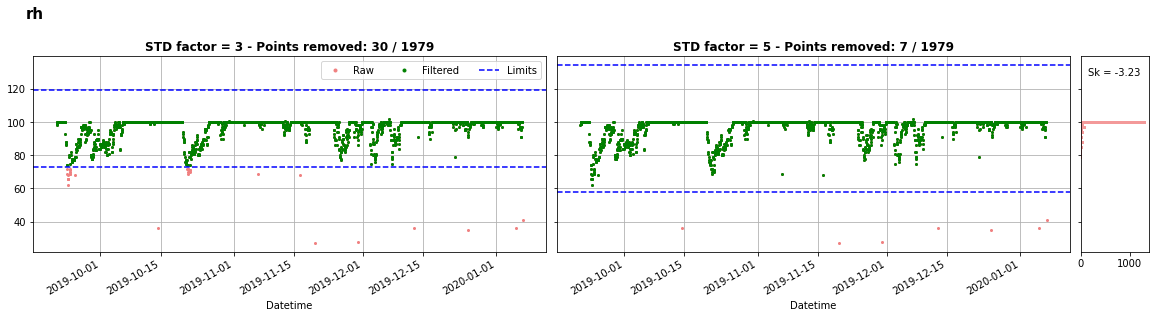

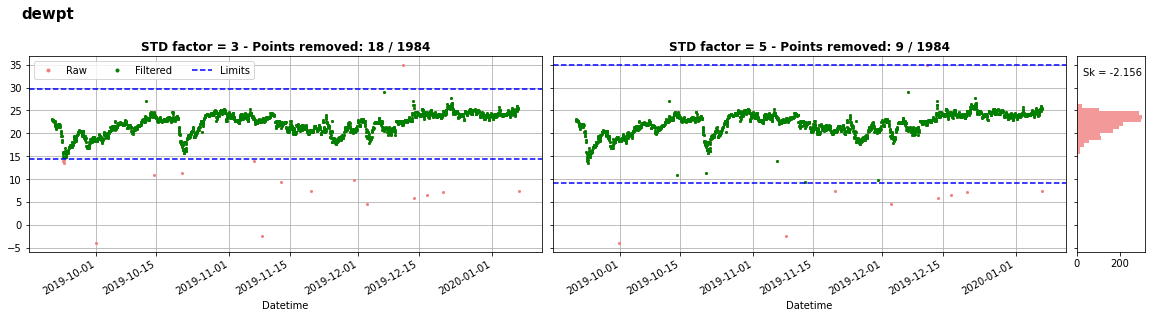

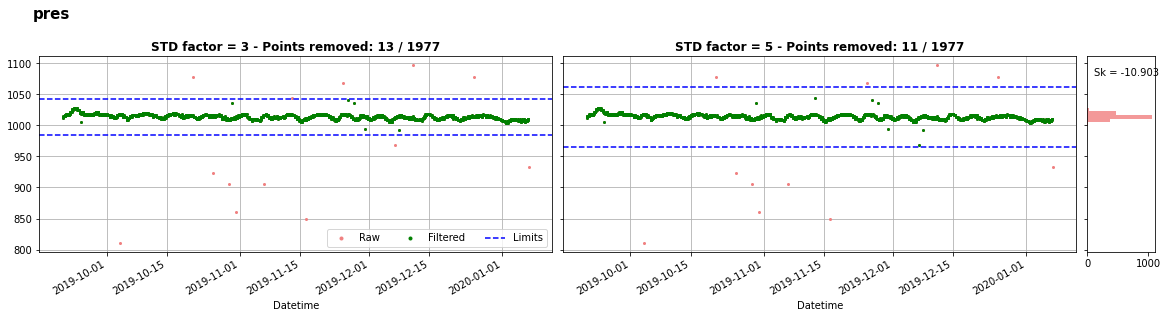

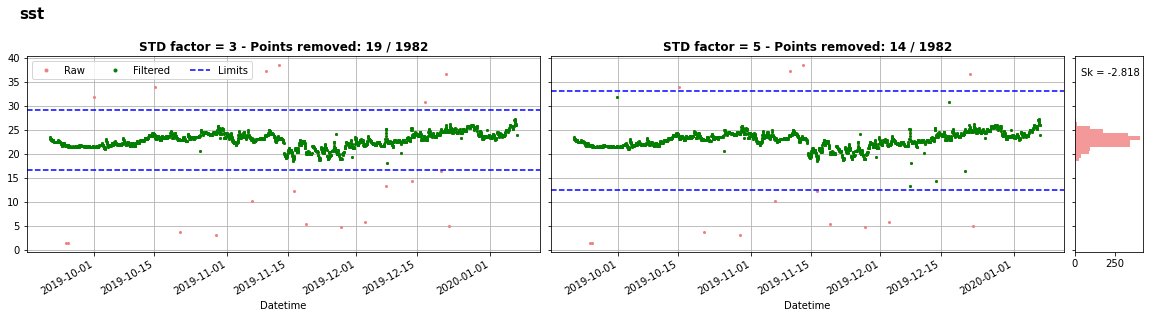

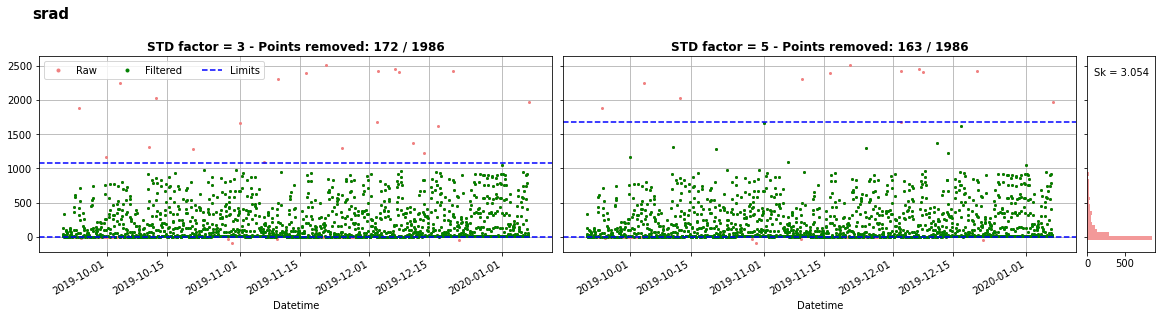

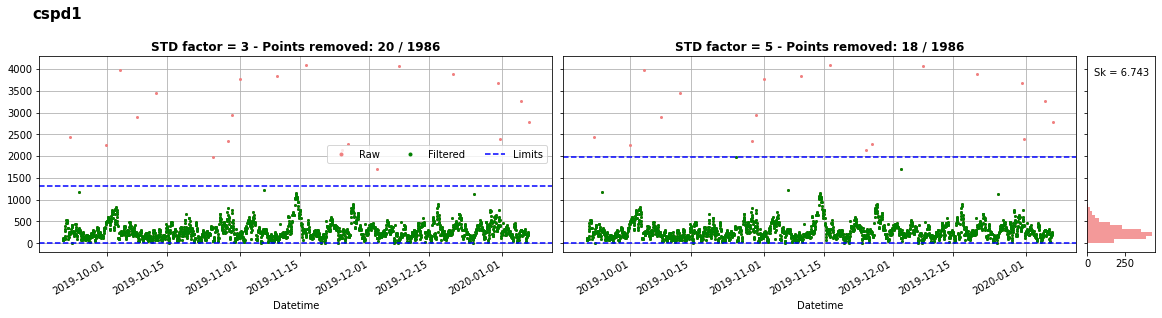

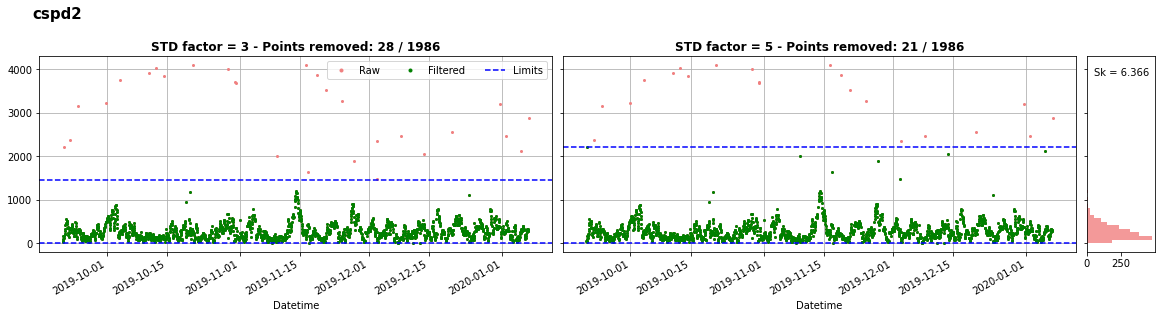

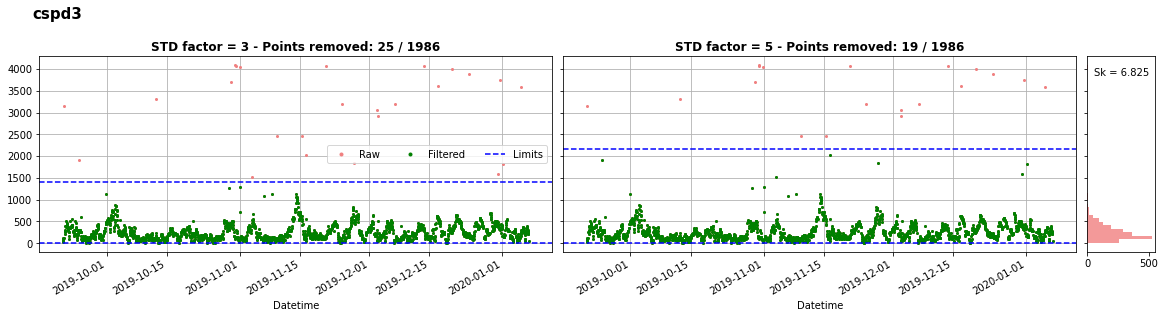

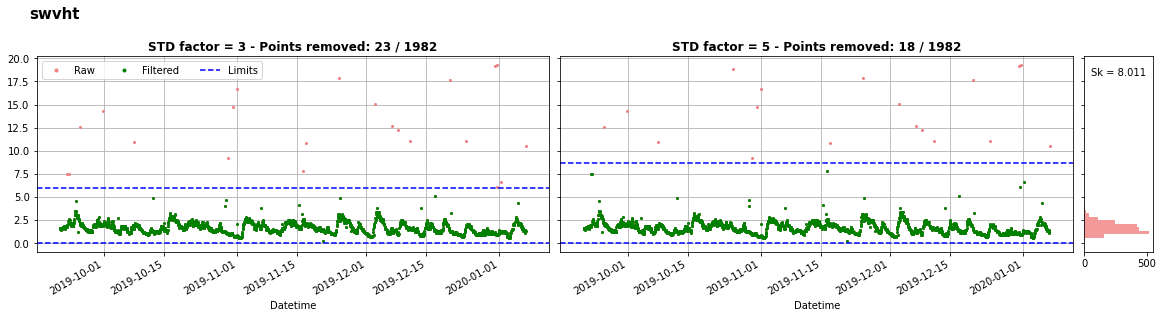

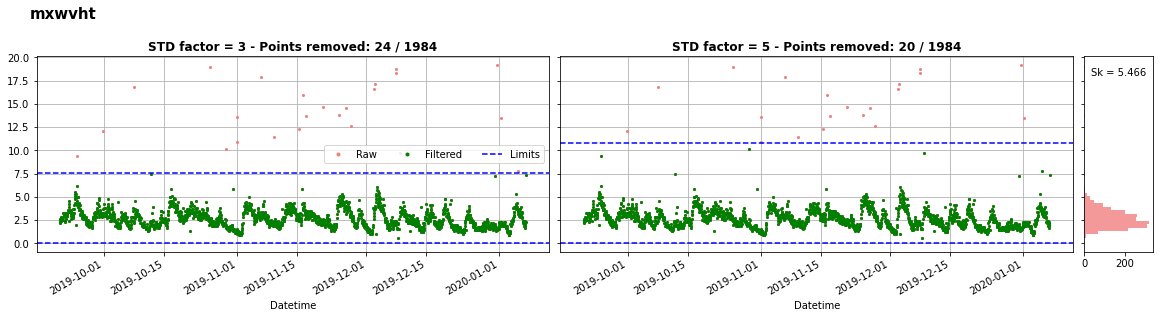

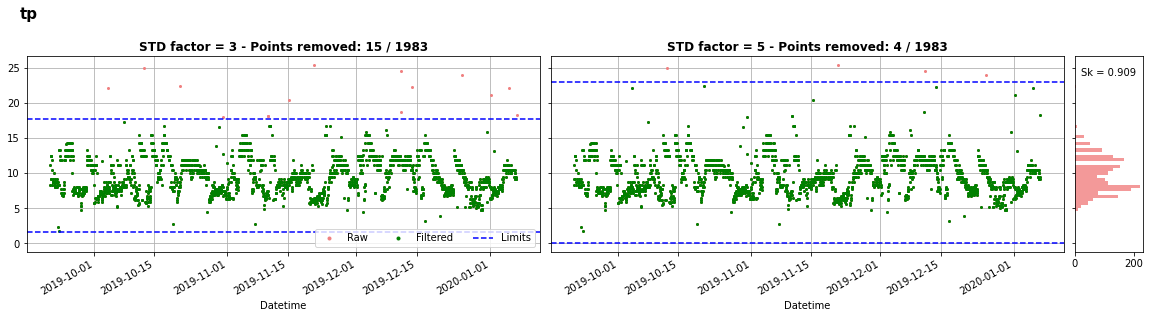

In [14]:
parameters = itaguai.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=itaguai,
                    limits=itaguai_lims,
                    buoy='itaguai',
                    parameter=param)
    plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

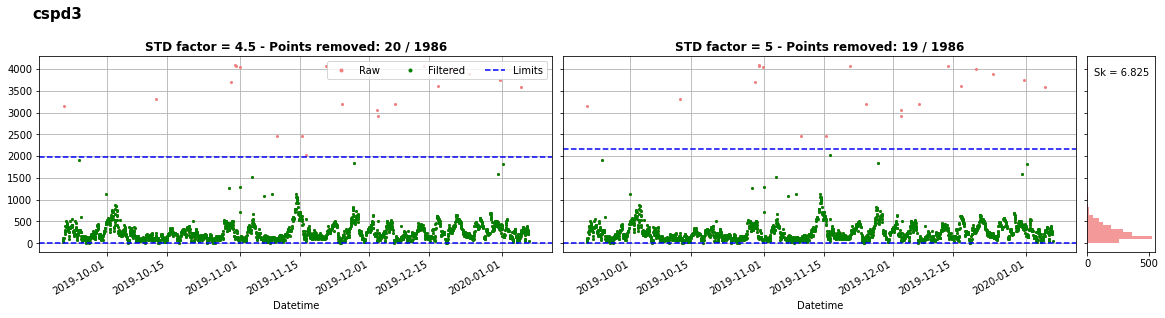

In [30]:
param = 'cspd3'
plot_comparison(factor1=4.5, 
                    factor2=5, 
                    data=itaguai,
                    limits=itaguai_lims,
                    buoy='itaguai',
                    parameter=param)
plt.show()

In [34]:
factors = {
    "swvht": 5,
    "mxwvht": 5,
    "tp": 5,
    "wspd1": 5,
    "gust1": 5,
    "wspd2": 5,
    "gust2": 5,
    "atmp": 5,
    "rh": 5,
    "srad": 5,
    "pres": 5,
    "dewpt": 5,
    "sst": 5,
    "tp": 5,
    "cspd1": 5,
    "cspd2": 5,
    "cspd3": 5,
    }

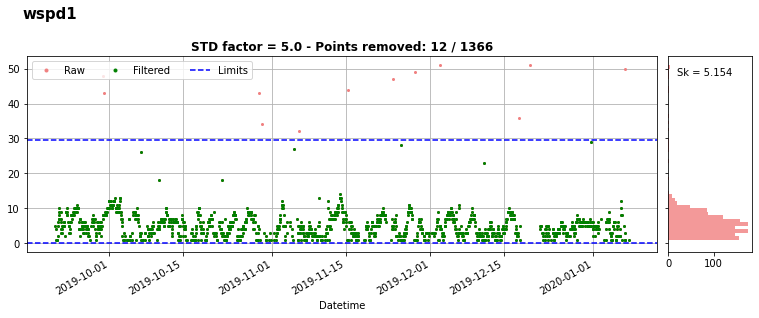

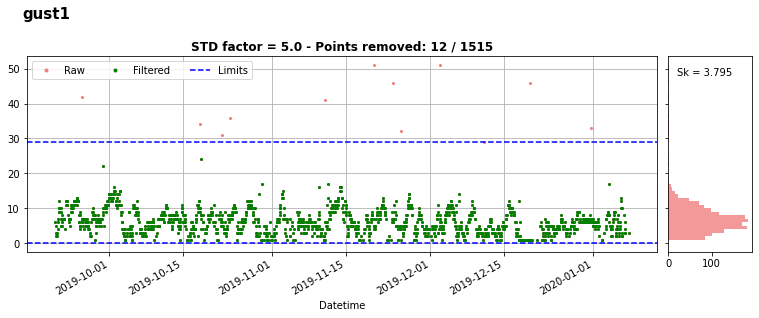

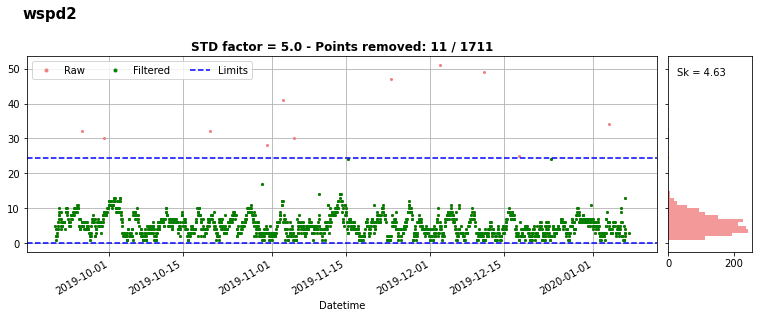

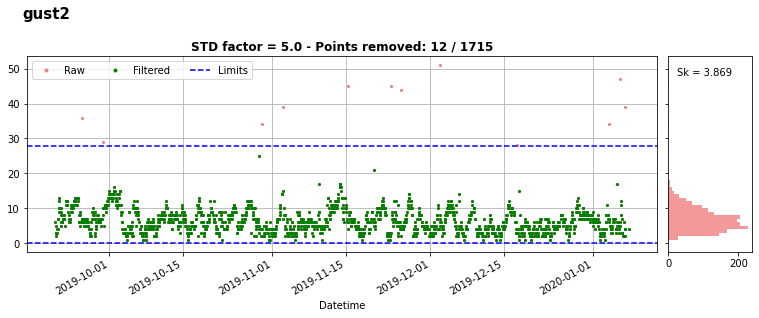

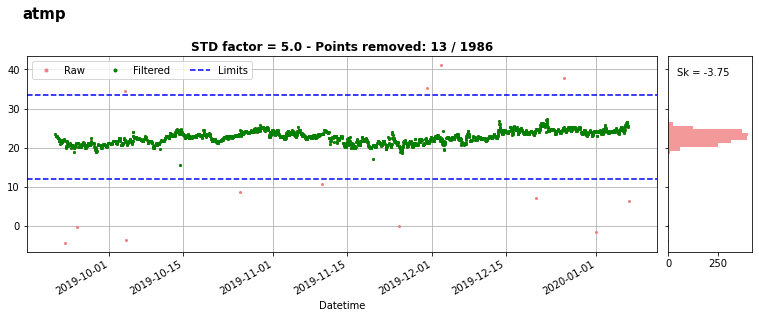

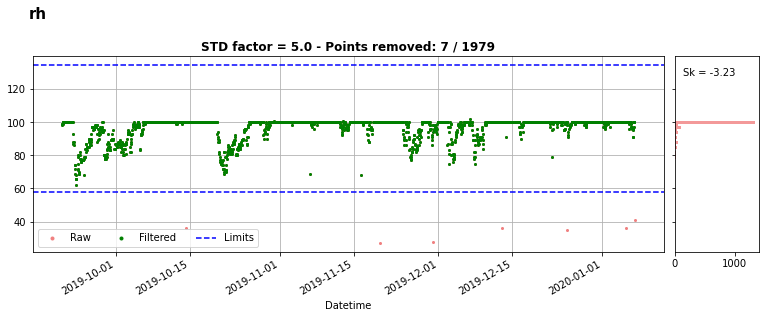

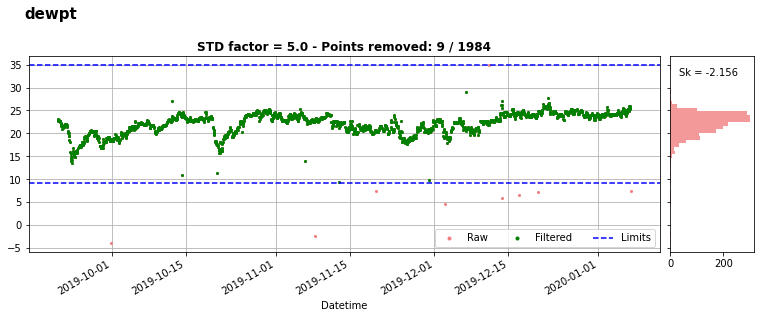

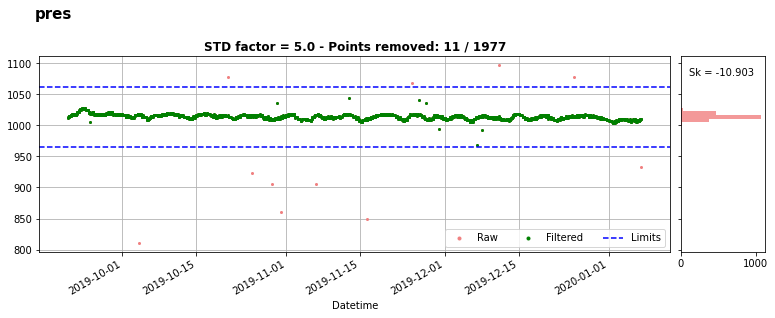

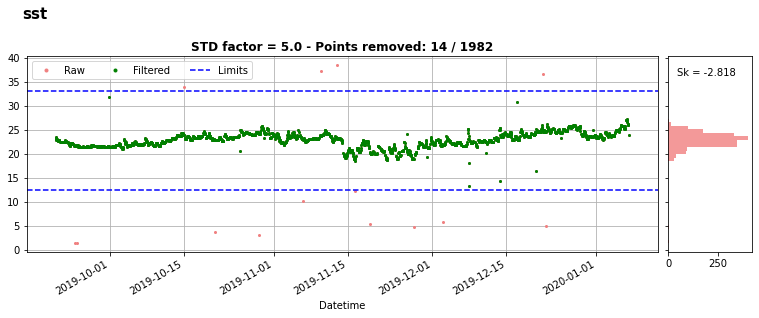

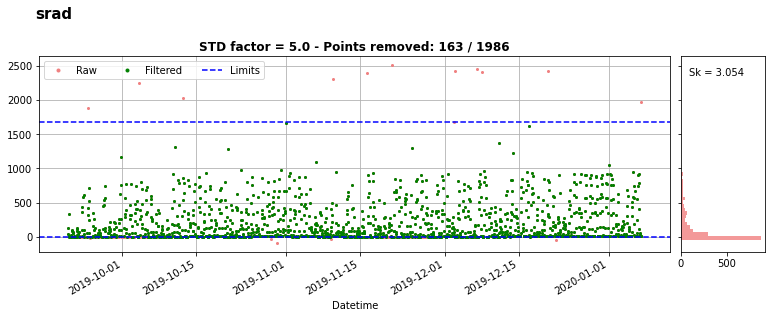

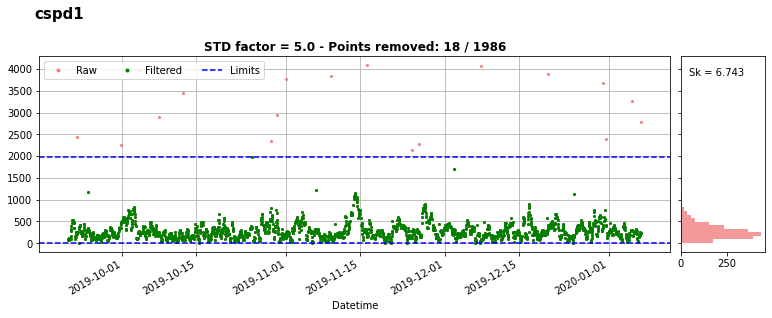

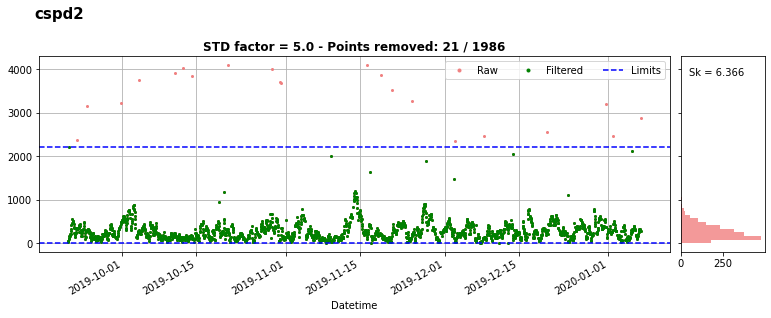

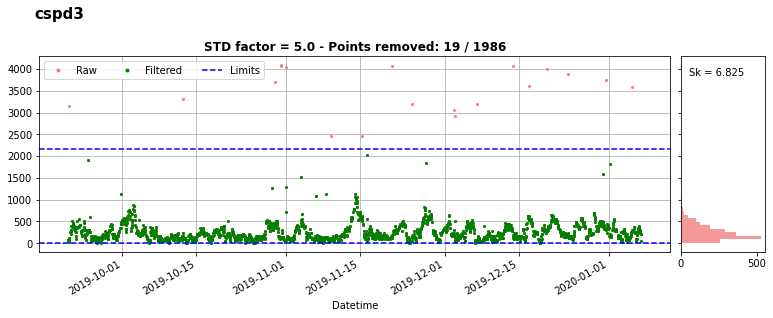

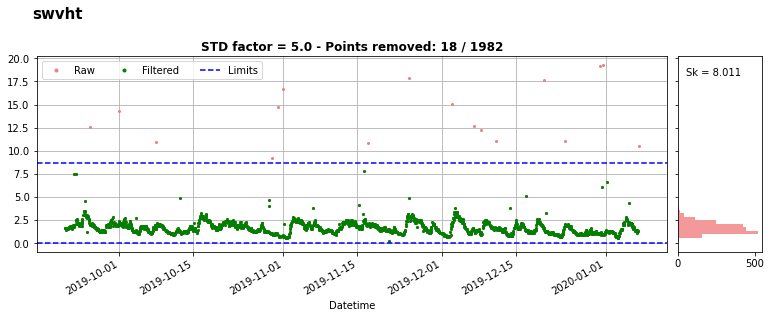

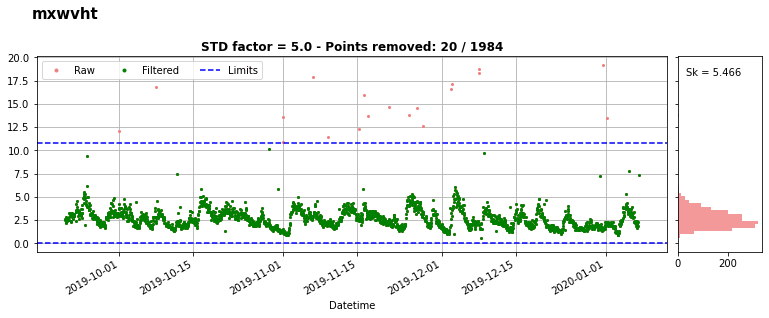

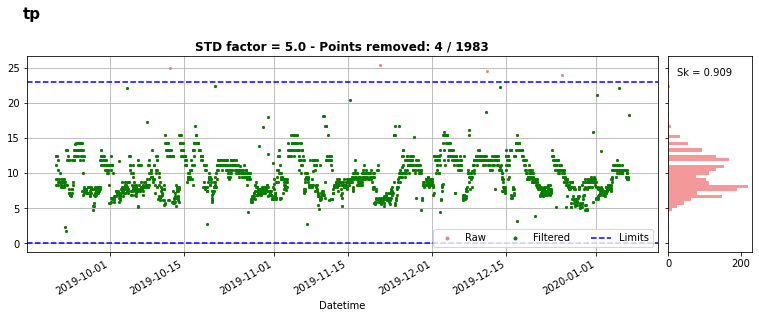

In [35]:
# FILTERING WITH DEFINITIVE FACTORS
itaguai_notdir = itaguai.drop(columns=itaguai.filter(regex='dir|head|spread').columns)
parameters = itaguai_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=itaguai,
                    limits=itaguai_lims,
                    buoy='itaguai',
                    parameter=param)
    plt.show()

In [37]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS

factors = {
    "swvht": 5,
    "mxwvht": 5,
    "tp": 5,
    "wspd1": 5,
    "gust1": 5,
    "wspd2": 5,
    "gust2": 5,
    "atmp": 5,
    "rh": 5,
    "srad": 5,
    "pres": 5,
    "dewpt": 5,
    "sst": 5,
    "tp": 5,
    "cspd1": 5,
    "cspd2": 5,
    "cspd3": 5,
    }

itaguai_out_lims_df = gen_outlier_lim(data=itaguai,
                                     buoy_name='itaguai',
                                     std_factor=factors).round(1)

In [38]:
itaguai_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,5.4,4.8,5.0,24.2,0.0,29.6
gust1,6.6,4.5,5.0,22.3,0.0,28.9
wspd2,5.3,3.8,5.0,19.0,0.0,24.3
gust2,6.6,4.2,5.0,21.2,0.0,27.8
atmp,22.7,2.2,5.0,10.8,11.9,33.4
rh,96.2,7.6,5.0,38.2,57.9,134.4
dewpt,22.0,2.6,5.0,12.8,9.2,34.9
pres,1013.6,9.6,5.0,47.9,965.7,1061.5
sst,22.8,2.1,5.0,10.4,12.4,33.2


In [39]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS
itaguai_out_lims_dict = manual_outlier_lims(itaguai_out_lims_df, buoy_name='itaguai')

In [40]:
itaguai_out_lims_dict

{'wspd1': [0.0, 29.6],
 'gust1': [0.0, 28.9],
 'wspd2': [0.0, 24.3],
 'gust2': [0.0, 27.8],
 'atmp': [11.9, 33.4],
 'rh': [57.9, 134.4],
 'dewpt': [9.2, 34.9],
 'pres': [965.7, 1061.5],
 'sst': [12.4, 33.2],
 'srad': [0.0, 1674.5],
 'cspd1': [0.0, 1980.2],
 'cspd2': [0.0, 2217.1],
 'cspd3': [0.0, 2158.6],
 'swvht': [0.0, 8.7],
 'mxwvht': [0.0, 10.8],
 'tp': [0.0, 23.0]}

In [41]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
itaguai_definitive = filter_data(data=buoys_df_raw,
                    buoy='itaguai',
                    limits=itaguai_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=itaguai_out_lims_dict)

outlier_check done.
